# TP1 : Classification de voyelles par lois gaussiennes
NOM - PRÉNOM : FOUILHE - Guilhem

Déposer le notebook sur Moodle à la fin de la séance

### Vérification des données


In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#1- Charger les données d'apprentissage avec le code suivant :
f = open('APP.pkl', 'rb')
dicoAPP = pickle.load(f)
app_aa = dicoAPP["aa"]
app_ii = dicoAPP["ii"]
app_uu = dicoAPP["uu"]
f.close()

f = open('EVAL.pkl', 'rb')
dicoEVAL = pickle.load(f)
eval_aa = dicoEVAL["aa"]
eval_ii = dicoEVAL["ii"]
eval_uu = dicoEVAL["uu"]
f.close()

# Vérifier le contenu et la taille des matrices
app_aa.shape
# Il s'agit de matrices 80x2 résultant d'une ACP sur une paramétrisation cepstrale (cf. cours M1 !).

(80, 2)

### Utilisation de lois gaussiennes

In [12]:
print(np.cov(app_aa).shape)

(80, 80)


In [13]:
#3- APPRENTISSAGE : estimer les paramètres (moyenne et matrice de covariance) de chaque classe
# Quelles sont les dimensions des variables crées ; que contiennent-elles ? 

def MeanAndCov(app):
    mean = np.mean(app,axis=0)
    cov = np.cov(app,rowvar=False)
    return mean, cov

mean_aa, cov_aa = MeanAndCov(app_aa)

mean_uu, cov_uu = MeanAndCov(app_uu)

mean_ii, cov_ii = MeanAndCov(app_ii)

print("Dimensions (moyenne, covariance) : ",mean_aa.shape, " ", cov_aa.shape)

Dimensions (moyenne, covariance) :  (2,)   (2, 2)


In [14]:
#4- RECONNAISSANCE : écrire une fonction "classer" qui renvoie la classe obtenue 
# par maximum de vraisemblance sur les lois gaussiennes estimées (modèle de chaque classe) 
# sur l'observation fournie en entrée :


def classer(obs, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii):
    logL = []
    
    logL.append(np.log(np.linalg.det(c_aa)) + (obs - m_aa).T @ np.linalg.inv(cov_aa) @ (obs - m_aa))
    logL.append(np.log(np.linalg.det(c_uu)) + (obs - m_uu).T @ np.linalg.inv(cov_uu) @ (obs - m_uu))
    logL.append(np.log(np.linalg.det(c_ii)) + (obs - m_ii).T @ np.linalg.inv(cov_ii) @ (obs - m_ii))

    return np.argmin(logL)

def getClassName(pred):
    if pred==0:
        return 'aa'
    if pred==1:
        return 'uu'
    if pred==2:
        return 'ii'

getClassName(classer(app_aa[0,:],mean_aa,cov_aa,mean_uu,cov_uu,mean_ii,cov_ii))

# Exemple de résultat : 
# classe = classer(tst_aa[0,:], m_aa, c_aa, m_uu, c_uu, m_ii, c_ii)
# => no_classe = 1

'aa'

In [16]:
#6- Définir la fonction tout_tester qui effectue tous les tests de classification 
def tout_tester(tst_aa,tst_ii,tst_uu,m_aa, c_aa, m_uu, c_uu, m_ii, c_ii):
    pred = []
    label = []

    for i in range(tst_aa.shape[0]):
        obs = tst_aa[i,:]
        pred.append(classer(obs, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii))
        label.append(0)
    
    for i in range(tst_uu.shape[0]):
        obs = tst_uu[i,:]
        pred.append(classer(obs, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii))
        label.append(1)
    
    for i in range(tst_ii.shape[0]):
        obs = tst_ii[i,:]
        pred.append(classer(obs, m_aa, c_aa, m_uu, c_uu, m_ii, c_ii))
        label.append(2)
    
    return pred, label

accuracy =  0.8127208480565371


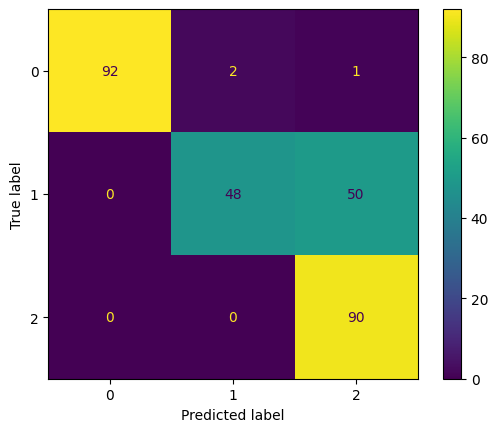

In [17]:
#7- Réaliser les tests et afficher la matrice de confusion et le taux de bonne reconnaisance correspondant 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

pred, label = tout_tester(eval_aa,eval_ii,eval_uu,mean_aa,cov_aa,mean_uu,cov_uu,mean_ii,cov_ii)

print('accuracy = ', accuracy_score(label,pred))

cm = confusion_matrix(label, pred)

cm_display = ConfusionMatrixDisplay(cm).plot()